In [1]:
%load_ext autoreload
%autoreload 2

In [2]:


import os
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import sys
import time 

# Thermodynamical Integration Calculation

In [3]:
from py_analysis.config.gen_var import DATA_DIR, RESULTS_DIR, TI_PARAMS
from py_analysis.config.custom_types import FreeEnergyResult
from typing import List, Dict, Tuple

In [8]:
def read_data(file_path):
    """
    Reads data from a file and returns x and y values as numpy arrays.
    The file should have two columns: x and y.
    """
    data = np.loadtxt(file_path, delimiter=',')  # Assumes comma-separated values
    x = data[:, 0]  # First column is x
    y = data[:, 1]  # Second column is y
    return x, y

def trapezoidal_integration(x, y):
    """
    Computes the integral of y with respect to x using the trapezoidal rule.
    """
    if len(x) != len(y):
        raise ValueError("x and y must have the same length.")
    
    integral = 0.0
    for i in range(1, len(x)):
        dx = x[i] - x[i - 1]  # Step size
        avg_y = (y[i] + y[i - 1]) / 2  # Average of y-values
        integral += dx * avg_y  # Area of trapezoid
    
    return integral



In [7]:
CLUSTER_directory_path = '~/pol/Projects/Codebase/NucleosomeMMC/output/clusterfiles'



In [6]:
# SEQ_LENGTH = TI_PARAMS['SEQ_LENGTH']
# SLIDE_INTERVAL = TI_PARAMS['SLIDE_INTERVAL']
# MU_RANGE = TI_PARAMS['MU_RANGE']
# MU_VALUES = TI_PARAMS['MU_VALUES']
# WHOLE_SEQ = TI_PARAMS['WHOLE_SEQ']

SEQ_LENGTH = 147
SLIDE_INTERVAL = 1
MU_RANGE = [0,1]
MU_VALUES = 20
WHOLE_SEQ = False

In [9]:
if WHOLE_SEQ:
    parameter_file_path = DATA_DIR / f"S288C_YAL002W-flanking1k_win{SEQ_LENGTH}_sl{SLIDE_INTERVAL}_mu{MU_RANGE[0]}-{MU_RANGE[1]}_n{MU_VALUES}.txt"
else:
    parameter_file_path = DATA_DIR / f"S288C_YAL002W-TSS_win{SEQ_LENGTH}_sl{SLIDE_INTERVAL}_mu{MU_RANGE[0]}-{MU_RANGE[1]}_n{MU_VALUES}.txt"
    TI_file_path = CLUSTER_directory_path + '/ShortSeq_TI_output.dat'



# Read the parameter file (columns: ID, μ, SeqA, SeqB)
df_param = pd.read_csv(parameter_file_path, sep='\t', header=None, names=['ID', 'mu', 'seqB_pos', 'seqA', 'seqB'])

TI_data = pd.read_csv(TI_file_path, sep=',', header=None, names=['ID', 'mu', 'Value', 'Value1'])

# Convert the ID columns to integers to ensure they match
df_param['ID'] = df_param['ID'].astype(int)
TI_data['ID'] = TI_data['ID'].astype(int)

merged_df = pd.merge(df_param, TI_data, on='ID', suffixes=('_param', '_TI'))

merged_df.drop(columns=['mu_param'], inplace=True)

merged_df.rename(columns={'mu_TI': 'mu'}, inplace=True)

print(merged_df)
 
# main(file_path=TI_file_path)


FileNotFoundError: [Errno 2] No such file or directory: '/home/pol_schiessel/maya620d/pol/Projects/Codebase/NucleosomeMMC/output/clusterfiles/ShortSeq_TI_output.dat'

In [23]:
# Group the merged dataframe by Seq_ID, sort by mu, and integrate the Value column using trapezoidal rule
integrated_values = []

for seq_id, group in merged_df.groupby('seqB_pos'):
    sorted_group = group.sort_values(by='mu')
    # Use numpy.trapz integration on the Value column with mu as the x-axis
    integrated_val = trapezoidal_integration(sorted_group['mu'].values, sorted_group['Value'].values)
    integrated_values.append({'seqB_pos': seq_id, 'integrated_value': integrated_val})

df_integrated = pd.DataFrame(integrated_values)

print(df_integrated)

      seqB_pos  integrated_value
0            1          0.131666
1            2         -2.110187
2            3         -4.812354
3            4         -6.325818
4            5         -4.439886
...        ...               ...
1348      1349          2.997182
1349      1350          4.548528
1350      1351          2.385439
1351      1352         -0.715310
1352      1353         -2.525320

[1353 rows x 2 columns]


In [24]:
# Group the merged dataframe by Seq_ID, sort by mu, and integrate the Value column using trapezoidal rule
integrated_values1 = []

for seq_id, group in merged_df.groupby('seqB_pos'):
    sorted_group = group.sort_values(by='mu')
    # Use numpy.trapz integration on the Value column with mu as the x-axis
    integrated_val = trapezoidal_integration(sorted_group['mu'].values, sorted_group['Value1'].values)
    integrated_values1.append({'seqB_pos': seq_id, 'integrated_value': integrated_val})

df_integrated1 = pd.DataFrame(integrated_values1)

print(df_integrated1)

      seqB_pos  integrated_value
0            1          0.127991
1            2         -2.107169
2            3         -4.811413
3            4         -6.326228
4            5         -4.440484
...        ...               ...
1348      1349          2.997218
1349      1350          4.548803
1350      1351          2.387862
1351      1352         -0.708377
1352      1353         -2.524990

[1353 rows x 2 columns]


### Calculate Free Energy from Model for S288C_YAL002W sequences

In [ ]:
# !python ~/pol/Projects/Codebase/NucleosomeMMC/py_analysis/thermody_fe.py


In [ ]:

if WHOLE_SEQ:
    model_fe_path = RESULTS_DIR / f'pklfiles/thdyinteg/fe_model_S288C_YAL002W-flanking1k_win{SEQ_LENGTH}_sl{SLIDE_INTERVAL}_mu{MU_RANGE[0]}-{MU_RANGE[1]}_n{MU_VALUES}.txt'
else:
    model_fe_path = RESULTS_DIR / f'pklfiles/thdyinteg/fe_model_S288C_YAL002W-TSS_win{SEQ_LENGTH}_sl{SLIDE_INTERVAL}_mu{MU_RANGE[0]}-{MU_RANGE[1]}_n{MU_VALUES}.txt'

model_df= pd.read_csv(model_fe_path, sep=',')

NameError: name 'SEQ_LENGTH' is not defined

In [42]:
ref_rows = model_df[model_df['subid'] == 'ref_seq']
if ref_rows.empty:
    raise ValueError("No row with subid 'ref_seq' found in model_df.")
else:
    ref_value = ref_rows.iloc[0]['F']

model_df['ddF_model'] = model_df['F'] - ref_value


In [43]:
mdf_intf_df = pd.merge(model_df, df_integrated, left_on='id', right_on='seqB_pos', how='left')
mdf_intf_df[['integrated_value']] = mdf_intf_df[['integrated_value']].fillna(0)
mdf_intf_df.rename(columns={'integrated_value': 'ddF_ti'}, inplace=True)

In [44]:
mean_f_relative = mdf_intf_df['ddF_model'].mean()
mean_integrated = mdf_intf_df['ddF_ti'].mean()

# Create new columns by subtracting the mean from each respective column
mdf_intf_df['ddG_model_centered'] = mdf_intf_df['ddF_model'] - mean_f_relative
mdf_intf_df['ddG_TI_centered'] = mdf_intf_df['ddF_ti'] - mean_integrated

In [62]:
mdf_intf_df["TSS_rel_bp"] = mdf_intf_df["id"] - 427

In [63]:
mdf_intf_df

,F,F_entropy,F_enthalpy,F_freedna,id,subid,ddF_model,seqB_pos,ddF_ti,ddG_model_centered,ddG_TI_centered,TSS_rel_bp
0,1881.812755,1819.707557,62.105198,1655.497912,0,ref_seq,0.000000,NaN,0.000000,2.178267,2.637807,-427
101,1881.340073,1819.386158,61.953916,1655.134202,1,NaN,-0.472682,1.0,0.131666,1.705585,2.769473,-426
102,1879.689576,1818.699092,60.990483,1654.612467,2,NaN,-2.123179,2.0,-2.110187,0.055087,0.527621,-425
103,1877.877035,1818.292885,59.584149,1654.465883,3,NaN,-3.935720,3.0,-4.812354,-1.757453,-2.174547,-424
104,1876.698371,1817.609012,59.089359,1653.745928,4,NaN,-5.114384,4.0,-6.325818,-2.936117,-3.688010,-423
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,1886.185030,1819.269731,66.915299,1655.405402,1349,NaN,4.372274,1349.0,2.997182,6.550541,5.634989,922
1150,1886.384708,1819.484757,66.899951,1655.440294,1350,NaN,4.571953,1350.0,4.548528,6.750220,7.186335,923
1151,1884.833315,1819.811741,65.021574,1655.943266,1351,NaN,3.020560,1351.0,2.385439,5.198827,5.023246,924
1152,1881.423371,1818.966377,62.456994,1655.076584,1352,NaN,-0.389384,1352.0,-0.715310,1.788883,1.922497,925


In [64]:
def moving_average(data, window_size=15):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

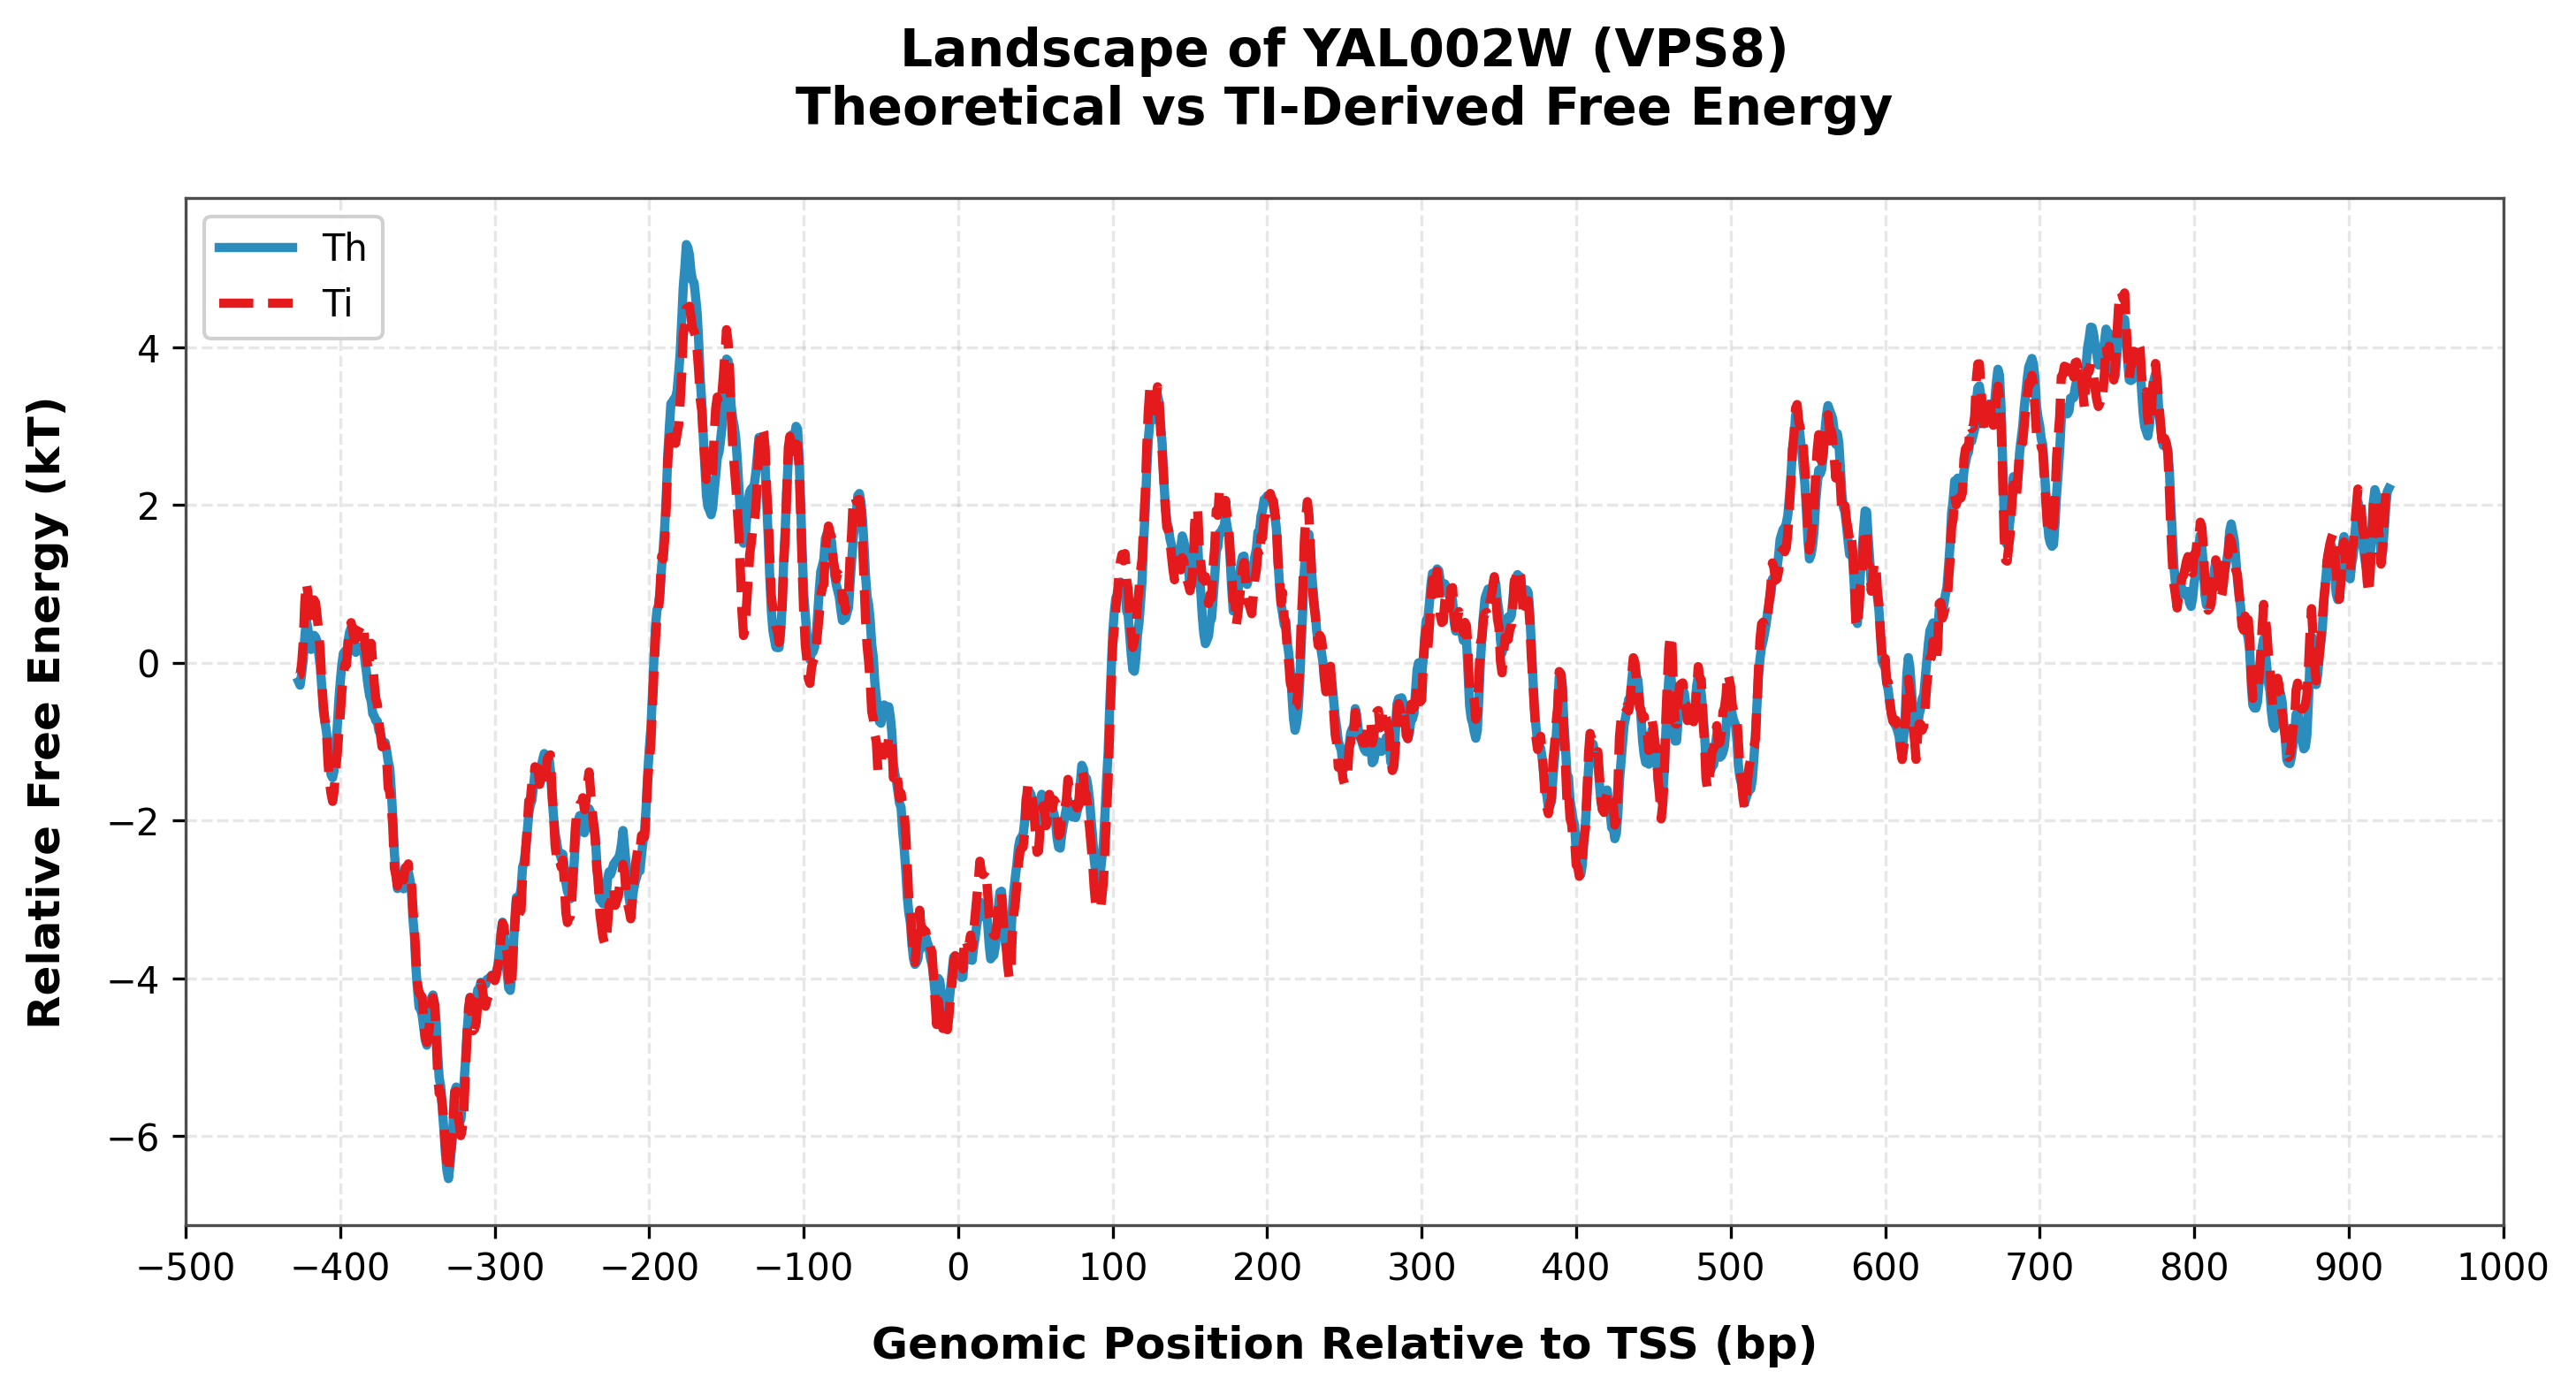

In [ ]:
if WHOLE_SEQ:
    mdf_intf_df.to_csv(RESULTS_DIR / f'nbfiles/thdyinteg/line_fe_model_ti_S288C_YAL002W-flanking1k_win{SEQ_LENGTH}_sl{SLIDE_INTERVAL}_mu{MU_RANGE[0]}-{MU_RANGE[1]}_n{MU_VALUES}.txt', index=False)
else:
    mdf_intf_df.to_csv(RESULTS_DIR / f'nbfiles/thdyinteg/line_fe_model_ti_S288C_YAL002W-TSS_win{SEQ_LENGTH}_sl{SLIDE_INTERVAL}_mu{MU_RANGE[0]}-{MU_RANGE[1]}_n{MU_VALUES}.txt', index=False)



# Create figure with constrained layout
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
fig.tight_layout(pad=3)

# Sort dataframe by genomic position first
mdf_intf_df = mdf_intf_df.sort_values('TSS_rel_bp')

# Calculate smoothed curves
window_size = 11
smoothed_theory = moving_average(mdf_intf_df["ddG_model_centered"], window_size)
smoothed_thermo = moving_average(mdf_intf_df["ddG_TI_centered"], window_size)

# Create genomic position array with proper scaling
x_values = mdf_intf_df["TSS_rel_bp"].values

# Plot data with scientific styling
ax.plot(x_values, smoothed_theory, color='#2b8cbe', linewidth=2.5, label='Th', zorder=1)
ax.plot(x_values, smoothed_thermo, color='#e41a1c', linewidth=2.5, label='Ti', linestyle='--', zorder=1)



# Format axes
ax.set_xlabel('Genomic Position Relative to TSS (bp)', 
             fontsize=12, labelpad=10, fontweight='bold')
ax.set_ylabel('Relative Free Energy (kT)', 
            fontsize=12, labelpad=10, fontweight='bold')
ax.set_xlim(-500, 1000)
ax.set_xticks(np.arange(-500, 1001, 100))
ax.tick_params(axis='both', which='major', labelsize=10)

# Add legend and grid
ax.legend(loc='upper left', frameon=True, framealpha=0.9, facecolor='white')
ax.grid(True, alpha=0.3, linestyle='--')

# Add title with gene context
plt.title('Landscape of YAL002W (VPS8)\n'
         'Theoretical vs TI-Derived Free Energy', 
         pad=20, fontsize=14, fontweight='bold')


plt.show()

# for ext in ['.png', '.pdf', 'svg']:

#     if WHOLE_SEQ:
#         plt.savefig(RESULTS_DIR / f"nbfigs/thdyinteg/fe_model_vs_thermdy_flanking1k_win{SEQ_LENGTH}_sl{SLIDE_INTERVAL}_mu{MU_RANGE[0]}-{MU_RANGE[1]}_n{MU_VALUES}.{ext}", 
#                     dpi=300, bbox_inches='tight')
#     else:
#         plt.savefig(RESULTS_DIR / f"nbfigs/thdyinteg/fe_model_vs_thermdy_TSS_win{SEQ_LENGTH}_sl{SLIDE_INTERVAL}_mu{MU_RANGE[0]}-{MU_RANGE[1]}_n{MU_VALUES}.{ext}",
#                      dpi=300, bbox_inches='tight')

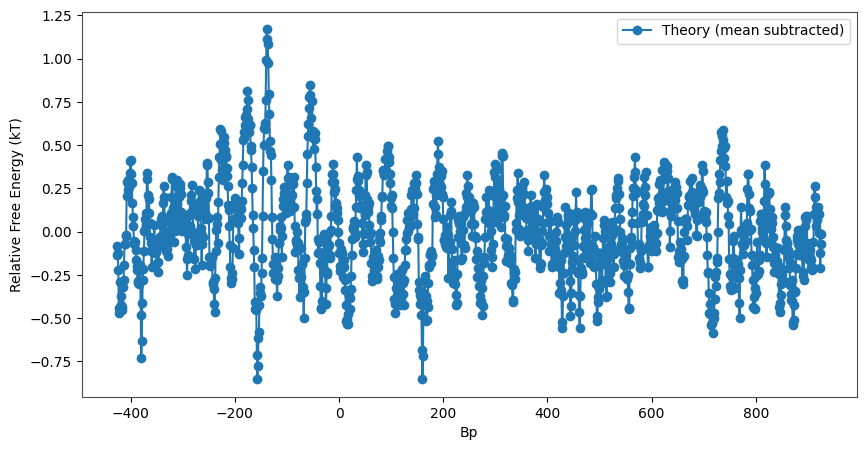

In [66]:

diff_values = smoothed_theory - smoothed_thermo


plt.figure(figsize=(10, 5))
plt.plot(x_values, diff_values, marker='o', label="Theory (mean subtracted)")
# plt.plot(ids, thermo_integrated_centered, marker='x', color='red', zorder=2, label="Thermo Integration (mean subtracted)")
plt.xlabel("Bp")
plt.ylabel("Relative Free Energy (kT)")
plt.legend()
plt.show()

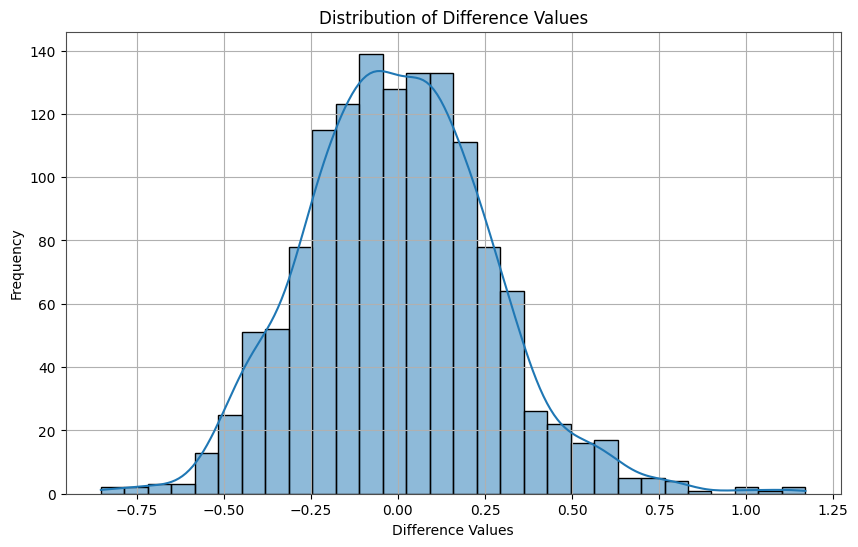

In [67]:
import seaborn as sns

# Plot the distribution of diff_values
plt.figure(figsize=(10, 6))
sns.histplot(diff_values, kde=True, bins=30)
plt.xlabel("Difference Values")
plt.ylabel("Frequency")
plt.title("Distribution of Difference Values")
plt.grid(True)
plt.show()

# Auto Correlation Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation_function(time_series, max_lag=None):

    
    n = len(time_series)
    if max_lag is None:
        max_lag = n // 4  # Default to half the length of the time series

    # Normalize the time series
    time_series = time_series - np.mean(time_series)
    variance = np.var(time_series)

    # Compute the autocorrelation function
    lags = np.arange(max_lag)
    acf = np.zeros(max_lag)

    for lag in lags:
        acf[lag] = np.correlate(time_series[:n - lag], time_series[lag:])[0] / (variance * (n - lag))

    return lags, acf

def integrated_autocorrelation_time(acf):
   
    # Integrated autocorrelation time: τ_int = 1 + 2 * sum(ACF)
    iat = 1 + 2 * np.sum(acf)
    return iat







Auto_Correlation_Replica1_S0.dat and Auto_Correlation_Replica1_S100 has sweep size 20 ran in 3500 seconds

Auto_Correlation_Replica1_S0_sweeps50.dat and Auto_Correlation_Replica1_S100_sweeps50 has sweep size 50 ran in 7876.452595 seconds

Auto_Correlation_Replica1_S0_sweeps100.dat and Auto_Correlation_Replica1_S100_sweeps100 has sweep size 100 ran in 25649.421530 seconds

In [ ]:
np.sqrt(2*140)*0.018855

np.float64(0.3155044960059999)

/var/folders/0q/hk4cnbf956x4fdcjqd53j4w00000gq/T/ipykernel_9767/3578382342.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, header=None, delim_whitespace=True)


[464.371389 444.210511 459.116876 ... 429.428076 438.931974 458.618542]
Mean Energy: 433.330499
Standard Error of Energies: 0.064412
Integrated Autocorrelation Time (IAT): 2425.72


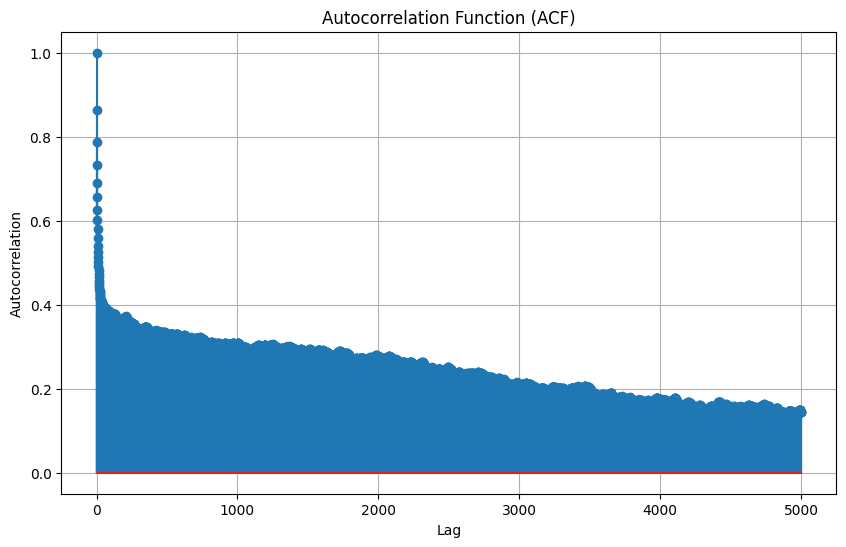

In [ ]:
file_path = os.path.expanduser("~/pol/Projects/Codebase/NucleosomeMMC/TI_output/OneRep_OneMu/1.dat")
data = pd.read_csv(file_path, header=None, delim_whitespace=True)
# data = data[0].str.split(',', expand=True).astype(float)
np_data = data.to_numpy()
del data

# mc_steps = np_data[:, 0]
# energies = np_data[:, 1]
# print(energies)
energies = np_data[:, 0]
print(energies)

# Calculate the standard error of the energies
standard_error = np.std(energies) / np.sqrt(len(energies))
mean_energy = np.mean(energies)
print(f"Mean Energy: {mean_energy:.6f}")
print(f"Standard Error of Energies: {standard_error:.6f}")

# Compute the autocorrelation function
lags, acf = autocorrelation_function(energies)

# Compute the integrated autocorrelation time
iat = integrated_autocorrelation_time(acf[:5000])

# Print the integrated autocorrelation time
print(f"Integrated Autocorrelation Time (IAT): {iat:.2f}")

# Plot the autocorrelation function
plt.figure(figsize=(10, 6))
plt.stem(lags[:5000], acf[:5000])
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")
plt.grid(True)
plt.show()

# Parallel Tempering Analysis

## Weighted Histogram Analysis for "mu" intervals

In [ ]:
# =============================================
# Step 2: Generate Histograms
# =============================================
def create_histogram(delta_es, bin_edges=None):
    """Creates a normalized histogram of delta_E values."""
    delta_es = np.asarray(delta_es, dtype=float)
    n = len(delta_es)
    bin_size = int(np.ceil(np.log2(n) + 1))

    counts, bin_edges = np.histogram(delta_es, bins=bin_size, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    return counts, bin_centers, bin_edges

In [ ]:






# =============================================
# Step 3: Histogram Reweighting
# =============================================
def reweight_histogram(counts_sim, bin_centers, mu_sim, mu_target):
    """Reweights a histogram from mu_sim to mu_target."""
    delta_mu = mu_target - mu_sim
    reweight_factor = np.exp(-delta_mu * bin_centers)
    counts_target = counts_sim * reweight_factor
    counts_target /= np.sum(counts_target)  # Normalize
    return counts_target

# =============================================
# Step 4: Calculate Overlap (Bhattacharyya Coefficient)
# =============================================
def calculate_overlap(hist1, hist2):
    """Computes the Bhattacharyya overlap coefficient between two histograms."""
    return np.sum(np.sqrt(hist1 * hist2))

# =============================================
# Step 5: Optimize μ Spacing
# =============================================
def optimize_mu_spacing(data, overlap_threshold=0.2):
    """Identifies where to add new μ values based on histogram overlap."""
    mus = sorted(data.keys())
    new_mus = []
    
    for i in range(len(mus) - 1):
        mu1 = mus[i]
        mu2 = mus[i + 1]
        mu_mid = (mu1 + mu2) / 2
        
        # Get histograms for mu1 and mu2
        counts1, bin_centers, _ = create_histogram(data[mu1])
        counts2, _, _ = create_histogram(data[mu2])
        
        # Reweight both to mu_mid
        counts1_reweighted = reweight_histogram(counts1, bin_centers, mu1, mu_mid)
        counts2_reweighted = reweight_histogram(counts2, bin_centers, mu2, mu_mid)
        
        # Plot histograms before reweighting
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(bin_centers, counts1, label=f'μ={mu1:.2f}')
        plt.plot(bin_centers, counts2, label=f'μ={mu2:.2f}')
        plt.xlabel('ΔE')
        plt.ylabel('Probability Density')
        plt.title('Histograms Before Reweighting')
        plt.legend()
        plt.grid(True)

        # Plot histograms after reweighting
        plt.subplot(1, 2, 2)
        plt.plot(bin_centers, counts1_reweighted, label=f'μ={mu1:.2f} reweighted')
        plt.plot(bin_centers, counts2_reweighted, label=f'μ={mu2:.2f} reweighted')
        plt.xlabel('ΔE')
        plt.ylabel('Probability Density')
        plt.title('Histograms After Reweighting')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()


        # Compute overlap
        overlap = calculate_overlap(counts1_reweighted, counts2_reweighted)
        print(f"Overlap between μ={mu1:.2f} and μ={mu2:.2f} at μ={mu_mid:.2f}: {overlap:.3f}")
        
        if overlap < overlap_threshold:
            new_mus.append(mu_mid)
            print(f"  → Low overlap! Add μ={mu_mid:.2f}")
    
    return new_mus


In [ ]:
def read_data(file_path):
    """
    Reads data from a file and returns a dictionary with μ values as keys.
    Each key contains a dictionary with 'delta_E' and 'H_e' values.
    """
    file_path = os.path.expanduser(file_path)

    data = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                mu, delta_E, H_e = map(float, line.split())
                if mu not in data:
                    data[mu] = {'delta_E': [], 'H_e': []}
                data[mu]['delta_E'].append(delta_E)
                data[mu]['H_e'].append(H_e)
        
        # Convert lists to numpy arrays
        for mu in data:
            data[mu]['delta_E'] = np.array(data[mu]['delta_E'])
            data[mu]['H_e'] = np.array(data[mu]['H_e'])
            
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
    
    return data

# Read data (replace 'data.txt' with your file)
data = read_data('~/pol/Projects/Codebase/NucleosomeMMC/TI_output/Hamiltonian_Energies_All_P_1.dat')

# # Optimize μ spacing
# new_mus = optimize_mu_spacing(data, overlap_threshold=0.2)

# Print results
print("\nSuggested new μ values:", new_mus)


Suggested new μ values: []


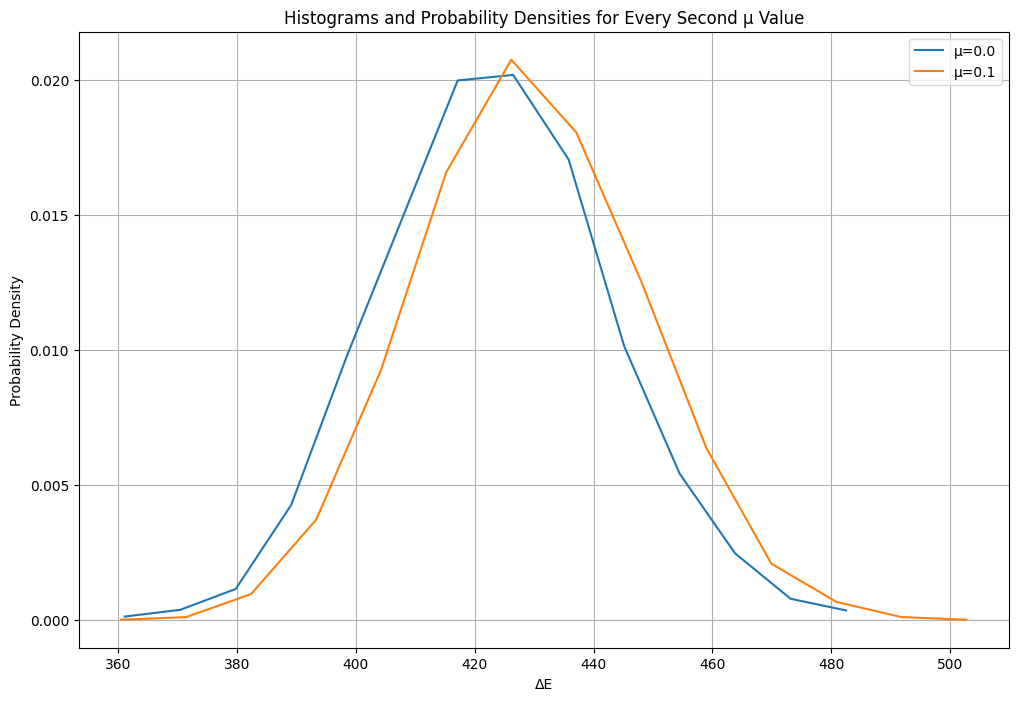

In [ ]:
data

# Plot histograms and probability densities for every second mu value
plt.figure(figsize=(12, 8))

for i, (mu, values) in enumerate(data.items()):
    
    delta_es, H_e = values.values() 
    # print(values)
    if i == 0 or i==1:  # Plot every second mu value
        counts, bin_centers, _ = create_histogram(H_e)
        plt.plot(bin_centers, counts, label=f'μ={mu:.1f}')

plt.xlabel('ΔE')
plt.ylabel('Probability Density')
plt.title('Histograms and Probability Densities for Every Second μ Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    """
    Reads a data file with three columns:
      1. μ value
      2. ΔE (delta_E)
      3. Hₑ
    """
    filename = os.path.expanduser(filename)

    try:
        data = np.loadtxt(filename)
        mu = data[:, 0]
        delta_E = data[:, 1]
        H_e = data[:, 2]
        return mu, delta_E, H_e
    except Exception as e:
        print(f"Error reading file {filename}: {e}")
        return None, None, None

def group_by_mu(mu, delta_E, H_e):
    """
    Groups the data by unique μ values.
    Returns:
      unique_mu: Sorted unique μ values.
      data_by_mu: Dictionary where each key is a μ value and the value is a dict with
                  keys 'delta_E' and 'H_e'.
    """
    unique_mu = np.unique(mu)
    data_by_mu = {}
    for m in unique_mu:
        idx = np.where(mu == m)[0]
        data_by_mu[m] = {'delta_E': delta_E[idx], 'H_e': H_e[idx]}
    return np.sort(unique_mu), data_by_mu

def compute_acceptance_rate(deltaE_array, delta_mu, beta=1.0):
    """
    Given an array of ΔE values (from one state) and a spacing delta_mu,
    compute the average swap acceptance probability:
       A = <min(1, exp(-beta * delta_mu * ΔE))>.
    """
    exp_factor = np.exp(-beta * delta_mu * deltaE_array)
    acceptance_values = np.minimum(1.0, exp_factor)
    A = np.mean(acceptance_values)
    return A

def analyze_acceptance(mu, data_by_mu, beta=1.0):
    """
    For each adjacent pair of μ values, compute the acceptance rate based on the ΔE
    samples from the lower-μ state.
    """
    acceptance_rates = {}
    unique_mu = np.sort(mu)
    
    for i in range(len(unique_mu)-1):
        mu_low = unique_mu[i]
        mu_high = unique_mu[i+1]
        delta_mu = mu_high - mu_low
        
        # Use the ΔE values from the lower state (or combine from both, if desired)
        deltaE_samples = data_by_mu[mu_low]['delta_E']
        A = compute_acceptance_rate(deltaE_samples, delta_mu, beta)
        acceptance_rates[(mu_low, mu_high)] = A
        print(f"Acceptance rate from μ={mu_low:.2f} to μ={mu_high:.2f} (Δμ={delta_mu:.2f}): {A:.3f}")
        
    return acceptance_rates

def plot_acceptance(acceptance_rates):
    """
    Plots the acceptance rates for each adjacent pair.
    """
    pairs = list(acceptance_rates.keys())
    rates = list(acceptance_rates.values())
    x_labels = [f"{pair[0]:.2f}->{pair[1]:.2f}" for pair in pairs]
    
    plt.figure(figsize=(8, 5))
    plt.bar(x_labels, rates, color='skyblue')
    plt.axhline(0.2, color='red', linestyle='--', label="Lower target (20%)")
    plt.axhline(0.4, color='green', linestyle='--', label="Upper target (40%)")
    plt.ylabel("Acceptance Rate")
    plt.title("Swap Acceptance Rate Between Adjacent μ States")
    plt.legend()
    plt.show()

def main():
    filename = "~/pol/Projects/Codebase/NucleosomeMMC/TI_output/Hamiltonian_Energies_All_P.dat"  # Update this to your file name
    beta = 1.0             # Set the inverse temperature (adjust if needed)
    
    mu, delta_E, H_e = read_data(filename)
    if mu is None:
        exit("Data could not be loaded.")
    
    unique_mu, data_by_mu = group_by_mu(mu, delta_E, H_e)
    print("Unique μ values:", unique_mu)
    
    # Compute acceptance rates for each adjacent pair.
    acceptance_rates = analyze_acceptance(unique_mu, data_by_mu, beta)
    
    # Plot the acceptance rates for visual inspection.
    plot_acceptance(acceptance_rates)
    
# main()


In [ ]:
replica_data = {'mu': [0.000000, 0.050000, 0.100000, 0.150000, 0.200000, 0.250000, 0.300000, 0.350000, 0.400000, 0.450000, 
                                           0.500000, 0.550000, 0.600000, 0.650000, 0.700000, 0.750000, 0.800000, 0.850000, 0.900000, 0.950000, 
                                           1.000000], 
                           'H_e': [143.916535, 126.100657, 109.422566, 93.604856, 77.951541, 63.461379, 48.983315, 35.285179, 21.243644, 
                                           7.784500, -5.764577, -18.949645, -32.241960, -45.754386, -59.123753, -73.455638, -87.887851, -102.846075, 
                                           -117.894879, -134.019537, -150.755810]}

df_replica = pd.DataFrame(replica_data)
thermodynamic_integration = np.trapezoid(df_replica['H_e'], df_replica['mu'])




print(df_replica)
print(f"Thermodynamic Integration: {thermodynamic_integration:.6f}")

      mu         H_e
0   0.00  143.916535
1   0.05  126.100657
2   0.10  109.422566
3   0.15   93.604856
4   0.20   77.951541
5   0.25   63.461379
6   0.30   48.983315
7   0.35   35.285179
8   0.40   21.243644
9   0.45    7.784500
10  0.50   -5.764577
11  0.55  -18.949645
12  0.60  -32.241960
13  0.65  -45.754386
14  0.70  -59.123753
15  0.75  -73.455638
16  0.80  -87.887851
17  0.85 -102.846075
18  0.90 -117.894879
19  0.95 -134.019537
20  1.00 -150.755810
Thermodynamic Integration: -4.876015
